In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

# Locate and load the data file
dfOrg = pd.read_csv('__FILE__dcgdpdata.csv')

# visibility
print(f'#rows={len(dfOrg)} #columns={len(dfOrg.columns)}')

#rows=180 #columns=66


This data can be reproduced at https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&acrdn=1 <br>
Under "Quarterly Gross Domestic Product by State" select "GDP in Current Dollars" <br>
Under "Areas" select "All Areas"<br>
and under "Statistic" select 
"All industry total," "Private industries," and "Government and government enterprises."<br>
select "Levels
under "Time Period" select "All Years" <br>
and "Download" (as a .csv).

Delete the first few rows of label material and the first column manually, then proceed.

In [2]:
dfOrg.head()

,GeoName,LineCode,Description,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,...,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3
0,United States *,1,All industry total,12761337.0,12910022.0,13142873.0,13332316.0,13603933.0,13749806.0,13867469.0,...,20552653.0,20742723.0,20909853.0,21115309.0,21329877.0,21540325.0,21747394.0,21561139.0,19520114.0,21170252.0
1,United States *,2,Private industries,11077821.0,11209861.0,11423916.0,11593875.0,11845005.0,11971058.0,12064197.0,...,18016210.0,18176429.0,18322961.0,18508889.0,18703833.0,18887214.0,19075070.0,18878959.0,16925474.0,18516614.0
2,United States *,83,Government and government enterprises,1683519.0,1700161.0,1718958.0,1738442.0,1758930.0,1778749.0,1803273.0,...,2536443.0,2566291.0,2586892.0,2606420.0,2626044.0,2653111.0,2672324.0,2682180.0,2594639.0,2653638.0
3,Alabama,1,All industry total,153077.8,155409.9,156809.7,160315.8,161732.8,163926.5,165313.1,...,220377.9,221504.3,224372.7,225565.2,226927.0,229328.2,230750.1,229831.4,209852.3,228062.3
4,Alabama,2,Private industries,128251.0,130351.6,131601.5,134687.2,136104.4,137600.3,139202.5,...,183873.5,184956.1,187273.4,188132.8,189010.4,190705.2,191919.0,190754.5,171848.6,189127.7


In [3]:
dfOrg.drop(['LineCode'], axis=1, inplace = True)

In [4]:
dfOrg.iloc[:,0]

0      United States *
1      United States *
2      United States *
3              Alabama
4              Alabama
            ...       
175     Rocky Mountain
176     Rocky Mountain
177           Far West
178           Far West
179           Far West
Name: GeoName, Length: 180, dtype: object

In [5]:
dfOrg.columns

Index(['GeoName', 'Description', '2005:Q1', '2005:Q2', '2005:Q3', '2005:Q4',
       '2006:Q1', '2006:Q2', '2006:Q3', '2006:Q4', '2007:Q1', '2007:Q2',
       '2007:Q3', '2007:Q4', '2008:Q1', '2008:Q2', '2008:Q3', '2008:Q4',
       '2009:Q1', '2009:Q2', '2009:Q3', '2009:Q4', '2010:Q1', '2010:Q2',
       '2010:Q3', '2010:Q4', '2011:Q1', '2011:Q2', '2011:Q3', '2011:Q4',
       '2012:Q1', '2012:Q2', '2012:Q3', '2012:Q4', '2013:Q1', '2013:Q2',
       '2013:Q3', '2013:Q4', '2014:Q1', '2014:Q2', '2014:Q3', '2014:Q4',
       '2015:Q1', '2015:Q2', '2015:Q3', '2015:Q4', '2016:Q1', '2016:Q2',
       '2016:Q3', '2016:Q4', '2017:Q1', '2017:Q2', '2017:Q3', '2017:Q4',
       '2018:Q1', '2018:Q2', '2018:Q3', '2018:Q4', '2019:Q1', '2019:Q2',
       '2019:Q3', '2019:Q4', '2020:Q1', '2020:Q2', '2020:Q3'],
      dtype='object')

In [6]:
dfOrg.GeoName.unique()

array(['United States *', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest',
       'Rocky Mountain', 'Far West'], dtype=object)

In [7]:
dfOrg.Description.unique()

array(['All industry total', '  Private industries',
       '  Government and government enterprises'], dtype=object)

In [8]:
dfOrgTotal = dfOrg[dfOrg['Description']=='All industry total']
dfOrgGov = dfOrg[dfOrg['Description']=='  Government and government enterprises']

In [9]:
dfOrgTotal.shape

(60, 65)

In [10]:
dfOrgGov.shape

(60, 65)

In [11]:
dfOrgTotal.drop(['Description'], axis=1, inplace = True)
dfOrgGov.drop(['Description'], axis=1, inplace = True)
print(dfOrgTotal.shape)
print(dfOrgGov.shape)

(60, 64)
(60, 64)


C:\Users\NonContraDiction\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
dfOrgTotal.drop(['GeoName'], axis=1, inplace = True)
dfOrgGov.drop(['GeoName'], axis=1, inplace = True)
print(dfOrgTotal.shape)
print(dfOrgGov.shape)

(60, 63)
(60, 63)


In [13]:
dfOrgTotal.head()

,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,2007:Q1,2007:Q2,...,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3
0,12761337.0,12910022.0,13142873.0,13332316.0,13603933.0,13749806.0,13867469.0,14037228.0,14208569.0,14382363.0,...,20552653.0,20742723.0,20909853.0,21115309.0,21329877.0,21540325.0,21747394.0,21561139.0,19520114.0,21170252.0
3,153077.8,155409.9,156809.7,160315.8,161732.8,163926.5,165313.1,166419.0,167130.4,169652.4,...,220377.9,221504.3,224372.7,225565.2,226927.0,229328.2,230750.1,229831.4,209852.3,228062.3
6,37393.9,38641.2,40259.9,42859.7,42664.7,44378.4,45039.4,45745.9,46468.8,48781.9,...,54207.3,54662.3,54765.1,54137.6,54279.9,54449.9,54674.7,52864.4,45644.4,50412.9
9,219879.5,225374.3,232290.1,235386.5,242418.5,244980.6,250030.6,255187.1,257836.6,261285.7,...,348608.0,352675.5,357076.8,361379.7,366904.9,373173.0,379018.8,377475.9,350140.9,378296.5
12,87648.2,88484.4,89890.7,92549.3,92836.0,94824.6,95041.7,95104.0,94145.5,95605.0,...,127670.5,128085.0,129333.4,129192.6,130471.2,131556.2,132596.4,131818.0,120812.4,130709.5


In [14]:
dfOrgGov.head()

,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,2007:Q1,2007:Q2,...,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3
2,1683519.0,1700161.0,1718958.0,1738442.0,1758930.0,1778749.0,1803273.0,1827041.0,1854450.0,1873873.0,...,2536443.0,2566291.0,2586892.0,2606420.0,2626044.0,2653111.0,2672324.0,2682180.0,2594639.0,2653638.0
5,24826.8,25058.3,25208.2,25628.6,25628.3,26326.2,26110.6,27196.0,27857.0,28267.8,...,36504.4,36548.2,37099.3,37432.4,37916.6,38623.0,38831.0,39076.9,38003.7,38934.6
8,7452.9,7499.0,7503.9,7737.7,7724.9,7865.0,7965.5,8103.8,8146.8,8260.7,...,11323.6,11461.3,11465.6,11593.4,11610.3,11614.9,11534.3,11532.0,11019.8,11632.3
11,28556.9,29631.1,30314.2,30241.1,31193.0,31079.1,32635.5,32252.8,32798.0,33255.1,...,43859.1,44489.7,44816.5,45180.7,45740.9,46208.5,46689.7,47129.4,45849.3,47213.4
14,11617.0,11704.8,11815.9,11890.7,12340.2,12496.4,12533.0,12625.4,12703.8,12865.2,...,16372.3,16680.4,16574.7,16713.3,16710.6,16901.7,16843.8,16965.0,16413.6,16821.7


In [15]:
dfdiv = 100 * dfOrgGov.reset_index(drop=True) / dfOrgTotal.reset_index(drop=True)
dfdiv.head()

,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,2007:Q1,2007:Q2,...,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3
0,13.192340,13.169311,13.079012,13.039310,12.929570,12.936539,13.003620,13.015682,13.051631,13.028965,...,12.341195,12.372006,12.371641,12.343745,12.311576,12.316950,12.288019,12.439881,13.292130,12.534749
1,16.218420,16.124005,16.075664,15.986322,15.846075,16.059758,15.794635,16.341884,16.667823,16.662187,...,16.564456,16.499996,16.534676,16.594936,16.708721,16.841801,16.828162,17.002420,18.109737,17.071914
2,19.930791,19.406747,18.638645,18.053556,18.106069,17.722586,17.685626,17.714812,17.531763,16.933945,...,20.889437,20.967468,20.935961,21.414691,21.389686,21.331352,21.096229,21.814302,24.142721,23.074054
3,12.987523,13.147506,13.050147,12.847423,12.867417,12.686351,13.052602,12.638883,12.720459,12.727486,...,12.581209,12.614911,12.550941,12.502279,12.466691,12.382595,12.318571,12.485406,13.094529,12.480528
4,13.254123,13.228094,13.144741,12.847963,13.292473,13.178437,13.186843,13.275362,13.493794,13.456618,...,12.823871,13.022914,12.815483,12.936732,12.807884,12.847513,12.703060,12.870018,13.586023,12.869531


In [16]:
dfdiv['GeoName'] = dfOrg.GeoName.unique()
dfdiv.head()

,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,2007:Q1,2007:Q2,...,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3,GeoName
0,13.192340,13.169311,13.079012,13.039310,12.929570,12.936539,13.003620,13.015682,13.051631,13.028965,...,12.372006,12.371641,12.343745,12.311576,12.316950,12.288019,12.439881,13.292130,12.534749,United States *
1,16.218420,16.124005,16.075664,15.986322,15.846075,16.059758,15.794635,16.341884,16.667823,16.662187,...,16.499996,16.534676,16.594936,16.708721,16.841801,16.828162,17.002420,18.109737,17.071914,Alabama
2,19.930791,19.406747,18.638645,18.053556,18.106069,17.722586,17.685626,17.714812,17.531763,16.933945,...,20.967468,20.935961,21.414691,21.389686,21.331352,21.096229,21.814302,24.142721,23.074054,Alaska
3,12.987523,13.147506,13.050147,12.847423,12.867417,12.686351,13.052602,12.638883,12.720459,12.727486,...,12.614911,12.550941,12.502279,12.466691,12.382595,12.318571,12.485406,13.094529,12.480528,Arizona
4,13.254123,13.228094,13.144741,12.847963,13.292473,13.178437,13.186843,13.275362,13.493794,13.456618,...,13.022914,12.815483,12.936732,12.807884,12.847513,12.703060,12.870018,13.586023,12.869531,Arkansas


In [17]:
cols = dfdiv.columns.tolist()
cols = cols[-1:] + cols[:-1]
dfdiv = dfdiv[cols]
dfdiv.head()

,GeoName,2005:Q1,2005:Q2,2005:Q3,2005:Q4,2006:Q1,2006:Q2,2006:Q3,2006:Q4,2007:Q1,...,2018:Q2,2018:Q3,2018:Q4,2019:Q1,2019:Q2,2019:Q3,2019:Q4,2020:Q1,2020:Q2,2020:Q3
0,United States *,13.192340,13.169311,13.079012,13.039310,12.929570,12.936539,13.003620,13.015682,13.051631,...,12.341195,12.372006,12.371641,12.343745,12.311576,12.316950,12.288019,12.439881,13.292130,12.534749
1,Alabama,16.218420,16.124005,16.075664,15.986322,15.846075,16.059758,15.794635,16.341884,16.667823,...,16.564456,16.499996,16.534676,16.594936,16.708721,16.841801,16.828162,17.002420,18.109737,17.071914
2,Alaska,19.930791,19.406747,18.638645,18.053556,18.106069,17.722586,17.685626,17.714812,17.531763,...,20.889437,20.967468,20.935961,21.414691,21.389686,21.331352,21.096229,21.814302,24.142721,23.074054
3,Arizona,12.987523,13.147506,13.050147,12.847423,12.867417,12.686351,13.052602,12.638883,12.720459,...,12.581209,12.614911,12.550941,12.502279,12.466691,12.382595,12.318571,12.485406,13.094529,12.480528
4,Arkansas,13.254123,13.228094,13.144741,12.847963,13.292473,13.178437,13.186843,13.275362,13.493794,...,12.823871,13.022914,12.815483,12.936732,12.807884,12.847513,12.703060,12.870018,13.586023,12.869531


In [18]:
dfts = dfdiv.T

In [19]:
dfts.columns = dfts.iloc[0]

In [20]:
#dfts = dfts.drop(0)
dfts = dfts.drop(['GeoName'])
dfts.head()

GeoName,United States *,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
2005:Q1,13.1923,16.2184,19.9308,12.9875,13.2541,12.4307,13.1474,9.69689,9.49375,35.5448,...,11.4782,14.925,11.082,13.067,10.8898,11.9565,13.6804,12.7308,13.9832,12.951
2005:Q2,13.1693,16.124,19.4067,13.1475,13.2281,12.2891,13.083,10.2308,10.5389,35.3707,...,11.4329,14.0984,11.1974,13.1022,10.9703,11.9322,13.6326,12.6668,13.8282,12.7814
2005:Q3,13.079,16.0757,18.6386,13.0501,13.1447,12.2323,12.5963,10.2464,10.4064,35.1577,...,11.5831,13.7471,11.182,13.076,10.9102,11.8759,13.4714,12.4189,13.5275,12.6923
2005:Q4,13.0393,15.9863,18.0536,12.8474,12.848,12.0538,12.7545,9.97878,8.92379,35.2485,...,11.2633,13.1673,11.2391,13.0118,10.9614,12.0384,13.4386,12.3396,13.5603,12.6007
2006:Q1,12.9296,15.8461,18.1061,12.8674,13.2925,12.0936,12.6199,9.79703,9.52853,35.2359,...,11.4948,12.8451,11.0859,12.7638,11.0319,12.0569,13.3282,12.1026,13.3664,12.6166


In [21]:
dfts.columns

Index(['United States *', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain',
       'Far West'],
      dtype='object', name='GeoName')

In [22]:
dfts.reset_index(inplace=True)
dfts.head()

GeoName,index,United States *,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
0,2005:Q1,13.1923,16.2184,19.9308,12.9875,13.2541,12.4307,13.1474,9.69689,9.49375,...,11.4782,14.925,11.082,13.067,10.8898,11.9565,13.6804,12.7308,13.9832,12.951
1,2005:Q2,13.1693,16.124,19.4067,13.1475,13.2281,12.2891,13.083,10.2308,10.5389,...,11.4329,14.0984,11.1974,13.1022,10.9703,11.9322,13.6326,12.6668,13.8282,12.7814
2,2005:Q3,13.079,16.0757,18.6386,13.0501,13.1447,12.2323,12.5963,10.2464,10.4064,...,11.5831,13.7471,11.182,13.076,10.9102,11.8759,13.4714,12.4189,13.5275,12.6923
3,2005:Q4,13.0393,15.9863,18.0536,12.8474,12.848,12.0538,12.7545,9.97878,8.92379,...,11.2633,13.1673,11.2391,13.0118,10.9614,12.0384,13.4386,12.3396,13.5603,12.6007
4,2006:Q1,12.9296,15.8461,18.1061,12.8674,13.2925,12.0936,12.6199,9.79703,9.52853,...,11.4948,12.8451,11.0859,12.7638,11.0319,12.0569,13.3282,12.1026,13.3664,12.6166


In [23]:
dfts.drop('index', axis=1)

GeoName,United States *,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
0,13.1923,16.2184,19.9308,12.9875,13.2541,12.4307,13.1474,9.69689,9.49375,35.5448,...,11.4782,14.925,11.082,13.067,10.8898,11.9565,13.6804,12.7308,13.9832,12.951
1,13.1693,16.124,19.4067,13.1475,13.2281,12.2891,13.083,10.2308,10.5389,35.3707,...,11.4329,14.0984,11.1974,13.1022,10.9703,11.9322,13.6326,12.6668,13.8282,12.7814
2,13.079,16.0757,18.6386,13.0501,13.1447,12.2323,12.5963,10.2464,10.4064,35.1577,...,11.5831,13.7471,11.182,13.076,10.9102,11.8759,13.4714,12.4189,13.5275,12.6923
3,13.0393,15.9863,18.0536,12.8474,12.848,12.0538,12.7545,9.97878,8.92379,35.2485,...,11.2633,13.1673,11.2391,13.0118,10.9614,12.0384,13.4386,12.3396,13.5603,12.6007
4,12.9296,15.8461,18.1061,12.8674,13.2925,12.0936,12.6199,9.79703,9.52853,35.2359,...,11.4948,12.8451,11.0859,12.7638,11.0319,12.0569,13.3282,12.1026,13.3664,12.6166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,12.3169,16.8418,21.3314,12.3826,12.8475,11.0957,12.0367,9.83087,10.3203,32.5417,...,10.5876,16.337,10.3478,12.1703,10.2027,11.3315,13.1195,11.8376,12.4946,11.6387
59,12.288,16.8282,21.0962,12.3186,12.7031,11.0641,12.0278,9.76216,10.1684,32.3791,...,10.7238,16.3219,10.2896,12.119,10.2083,11.2747,13.0785,11.9013,12.486,11.5976
60,12.4399,17.0024,21.8143,12.4854,12.87,11.1121,12.1471,9.84308,10.5294,32.5117,...,10.6948,17.2104,10.3739,12.229,10.3571,11.3779,13.2263,12.2545,12.6635,11.6806
61,13.2921,18.1097,24.1427,13.0945,13.586,11.7423,12.9765,10.3502,10.7846,34.7601,...,11.1953,19.4093,10.9961,13.2231,10.9562,12.0322,14.1435,13.3297,13.4724,12.3404


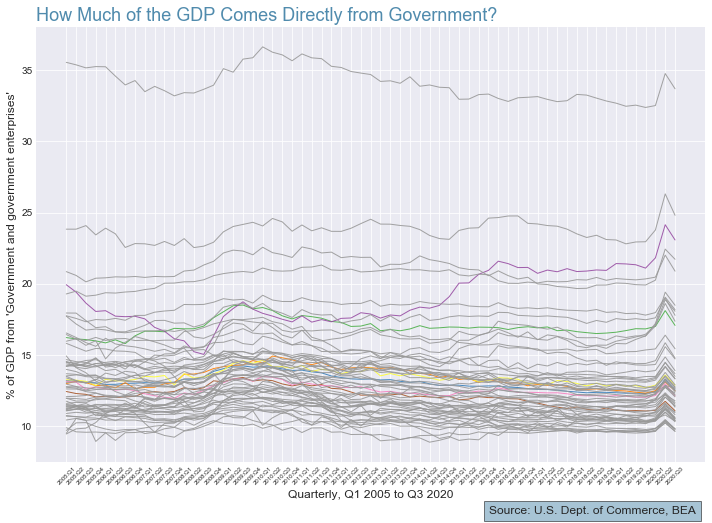

In [24]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in dfts.drop('index', axis=1):
    num+=1
    plt.plot(dfts['index'], dfts[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add titles
plt.title("How Much of the GDP Comes Directly from Government?", loc='left', fontsize=18, fontweight=0, color='#508bad')
plt.xlabel("Quarterly, Q1 2005 to Q3 2020", fontsize = 12)
plt.ylabel("% of GDP from 'Government and government enterprises'", fontsize = 12)

plt.xticks(rotation = 45, fontsize = 6)

import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)

#plt.text('2015: Q1',-1,'text')
plt.figtext(0.65, 0.035, "Source: U.S. Dept. of Commerce, BEA", 
            ha="left", fontsize=12, bbox={"facecolor":"#508bad", "alpha":0.5, "pad":5})

# Show the graph
plt.show()